# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
train_ds = pd.read_csv(r'sentiment_train', delimiter='\t')
train_ds.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [3]:
pd.set_option('max_colwidth',800)
train_ds[train_ds.sentiment == 1][:5] # First five positive sentiment

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [4]:
train_ds[train_ds.sentiment == 0][:5] # First five negative sentiment

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


In [5]:
train_ds['sentiment'].value_counts()

1    3943
0    2975
Name: sentiment, dtype: int64

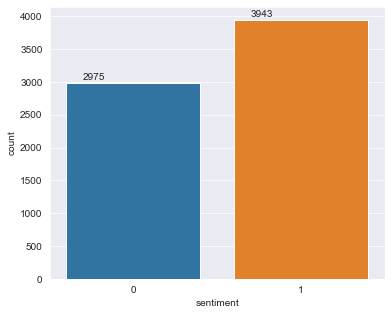

In [6]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data=train_ds,x = train_ds.sentiment)
for x in ax.patches:
    ax.annotate(x.get_height(),(x.get_x()+0.1, x.get_height()+50))

# Vectorizing Dataset

In [7]:
count_vector = CountVectorizer()
feature_vector = count_vector.fit(train_ds.text)
features = feature_vector.get_feature_names()
print('Total Number of features:',len(features))

Total Number of features: 2132


In [8]:
train_ds_features = count_vector.transform(train_ds.text)

In [9]:
train_ds_features.shape

(6918, 2132)

In [10]:
train_ds_features.getnnz() # Checking number of fields with non zero value

65398

In [11]:
print('density:', (train_ds_features.getnnz()*100)/(train_ds_features.shape[0]*train_ds_features.shape[1]))

density: 0.4434010415225908


99.55% of fields has value 0

In [12]:
train_ds_df = pd.DataFrame(train_ds_features.todense(),columns=features)

In [13]:
train_ds_df.head()

,00,007,10,10pm,12,16,17,1984,1st,200,...,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
feature_counts = np.sum(train_ds_features.toarray(), axis=0)
feature_counts_df = pd.DataFrame(dict(features = features, Count = feature_counts))
feature_counts_df.head()
# feature_counts

,features,Count
0,00,1
1,007,1
2,10,4
3,10pm,1
4,12,1


Text(0, 0.5, 'density')

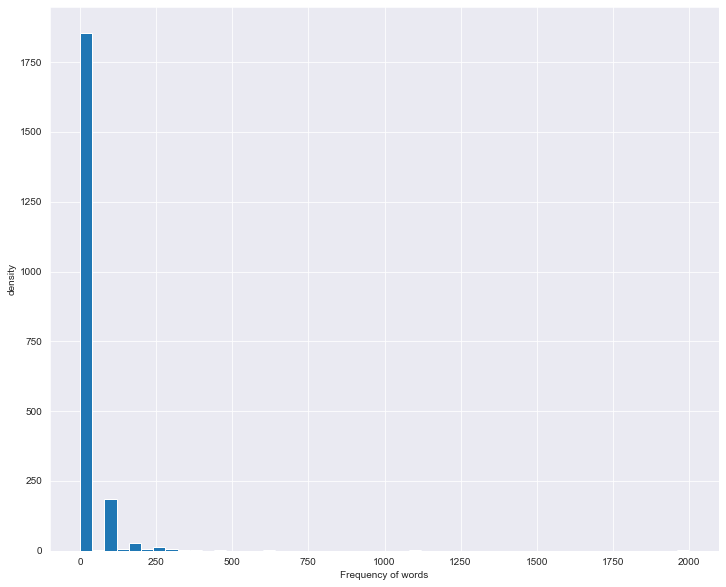

In [15]:
plt.figure(figsize=(12,10))
plt.hist(bins=50,x = feature_counts_df.Count, range=(0,2000))
plt.xlabel('Frequency of words')
plt.ylabel('density')

### Removing stop words & Stemming words

In [16]:
stop_words = text.ENGLISH_STOP_WORDS
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    stemmed_words = (stemmer.stem(w) for w in analyzer(doc))
    non_stop_words = [ word for word in list(set(stemmed_words) - set(stop_words))]
    return non_stop_words
count_vector = CountVectorizer(max_features=1000,analyzer=stemmed_words)
feature_vector = count_vector.fit(train_ds.text)
train_ds_features = count_vector.transform(train_ds.text)
features = feature_vector.get_feature_names()

In [17]:
train_ds_df = pd.DataFrame(train_ds_features.todense(), columns=features)

In [18]:
train_ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Columns: 1000 entries, 10 to zen
dtypes: int64(1000)
memory usage: 52.8 MB


In [19]:
X = train_ds_df[:]
y = train_ds.sentiment

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=99)

In [21]:
nb_clf = BernoulliNB()
nb_clf.fit(X_train,y_train)

BernoulliNB()

In [22]:
y_pred = nb_clf.predict(X_test)

In [23]:
acc = accuracy_score(y_test,y_pred)
print('Accuracy of the model:',acc)

Accuracy of the model: 0.992485549132948


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       739
           1       0.99      1.00      0.99       991

    accuracy                           0.99      1730
   macro avg       0.99      0.99      0.99      1730
weighted avg       0.99      0.99      0.99      1730



<AxesSubplot:>

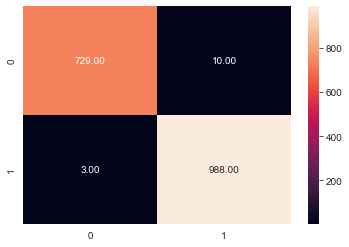

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.2f')